In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# Clientes 

In [2]:
clientes = pd.read_csv("../dados/olist_customers_dataset.csv")

In [3]:
clientes

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [4]:
def grafico_barras(df, colx, qt = None,titulo = None, xlabel = None, ylabel=None ,rotation = 10, tamanho = (15,5), rotulos = 0):
    # Dados
    x = df[colx].value_counts().index[:qt]
    y = df[colx].value_counts().values[:qt]


    #Tamanho da figura
    plt.figure(figsize=tamanho)

    #Escolha do palete de cores
    my_palette = sns.dark_palette("#79C", 10)

    #Gráfico
    ax = sns.barplot(
        x=x,
        y=y,
        palette=my_palette,
        hue=y,
        order=x,
        legend=False
    )

    # Elementos de identificação
    plt.title(titulo, fontsize=20, pad=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=rotation)


    #Rótulos das barras
    for barra in ax.patches:
        if barra.get_x()!=0:
            altura = barra.get_height()
            largura = barra.get_width()
            xpos = barra.get_x() + largura/2
            ypos = 1.01 * altura
            ax.text(x = xpos, y = ypos, s = f"{altura:.0f}", ha="center", va="bottom", fontsize = 11)


    #Remoção dos eixos e de dados de saída
    sns.despine()
    plt.show()

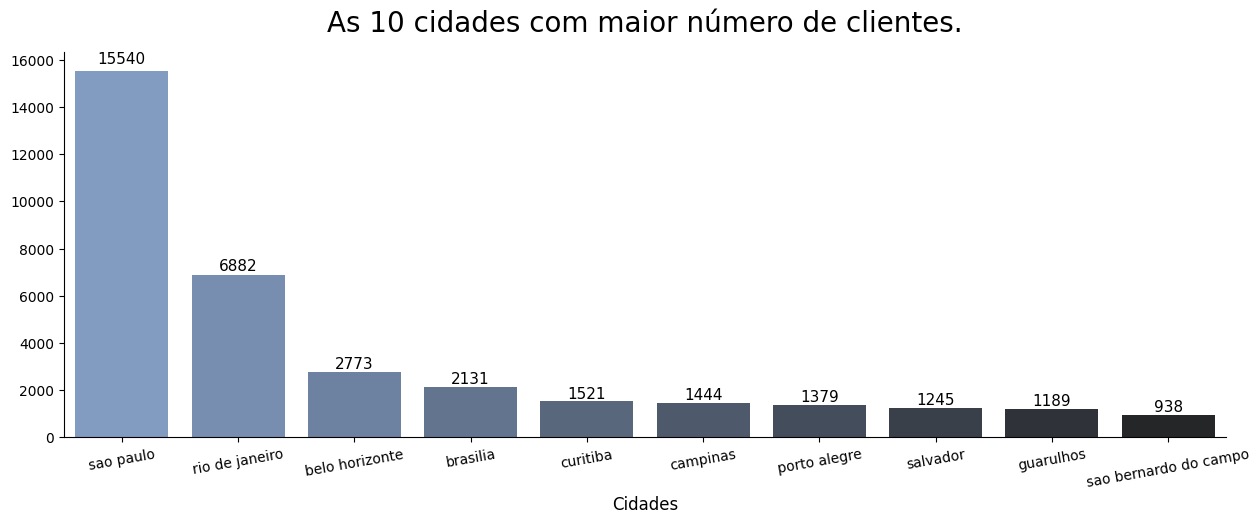

In [5]:
grafico_barras(df=clientes,colx= "customer_city", qt = 10, titulo= "As 10 cidades com maior número de clientes.", xlabel="Cidades")

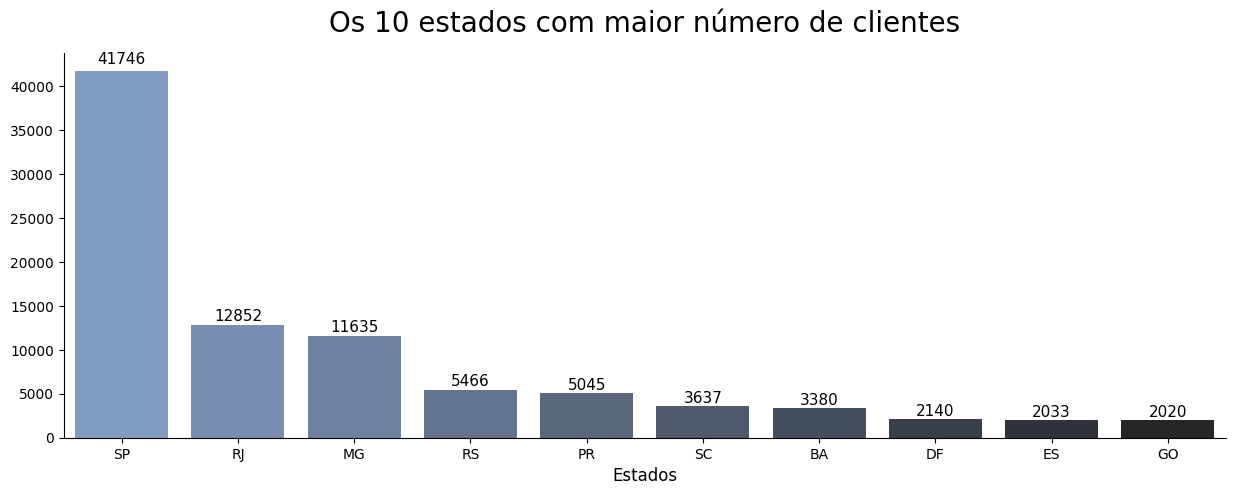

In [6]:
grafico_barras(df=clientes,colx='customer_state',qt=10, titulo="Os 10 estados com maior número de clientes", xlabel="Estados", rotation=0)

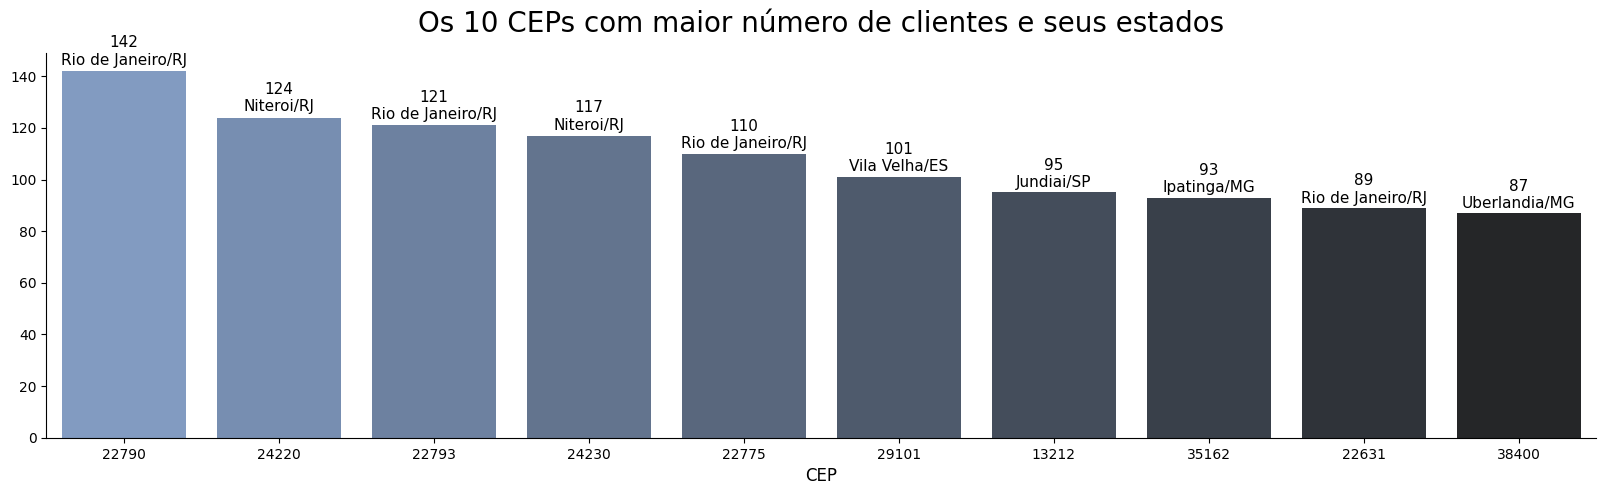

In [15]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=FutureWarning)
    # Dados
    x = clientes['customer_zip_code_prefix'].value_counts().index[:10]
    y = clientes['customer_zip_code_prefix'].value_counts().values[:10]
    rotation = None

    # Tamanho da figura
    plt.figure(figsize=(20,5))

    # Escolha do palete de cores
    n_cores = len(x)
    my_palette = sns.dark_palette("#79C", n_colors=n_cores)
    my_palette.reverse()


    # Gráfico
    ax = sns.barplot(
        x=x,
        y=y,
        order=x,
        palette=my_palette,
        legend=False,
        
    )

    # Elementos de identificação
    plt.title("Os 10 CEPs com maior número de clientes e seus estados", fontsize=20, pad=15)
    plt.xlabel("CEP", fontsize=12)
    plt.ylabel("", fontsize=12)
    plt.xticks(rotation=rotation)

    # Palavras que não devem ser capitalizadas
    palavras_nao_capitalizar = ['de', 'do', 'da', 'dos']

    # Rótulos das barras
    for barra, prefixo in zip(ax.patches, x):
        altura = barra.get_height()
        largura = barra.get_width()
        xpos = barra.get_x() + largura / 2
        ypos = 1.01 * altura
        cidade_estado = clientes.loc[clientes['customer_zip_code_prefix'] == prefixo, ['customer_city', 'customer_state']].iloc[0]
        cidade = [palavra.capitalize() if palavra.lower() not in palavras_nao_capitalizar else palavra for palavra in cidade_estado['customer_city'].split()]
        cidade_estado_str = f"{' '.join(cidade)}/{cidade_estado['customer_state']}"
        ax.text(x=xpos, y=ypos, s=f"{altura:.0f}\n{cidade_estado_str}", ha="center", va="bottom", fontsize=11)

    # Remoção dos eixos e de dados de saída
    sns.despine()
    plt.show()

É possível observar que mesmo que tanto o estado de São Paulo como a cidade de São Paulo são as que mais tem clientes, são Bairros do Rio de Janeiro que possuem maiores quantidade de clientes.